<a href="https://colab.research.google.com/github/Orest-tronic/FAST_AI/blob/master/Mon_test_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt
from PIL import Image

# PARTIE TEST DE L'ENVIRONNEMENT

In [4]:
a = 2
b = a + 3
c = b + a + 4
d = c + b + a + 5
a, b, c, d

(2, 5, 11, 23)

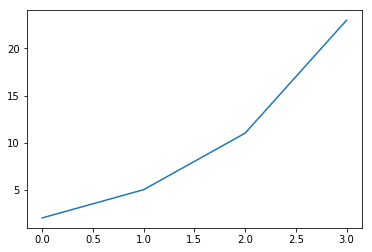

In [5]:
plt.plot([a, b, c, d])
plt.show()

In [6]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [8]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

#Debut de la partie CODAGE de l'IA

Nous créons l'objet path qui sera le chein vers lequel notre dataset sera enregistrer, dataset provenant de ***URLs.PETS***

In [7]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [9]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [11]:
fnames = get_image_files(path_img)
fnames[:7]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_18.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_100.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_77.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_92.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_3.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_31.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_38.jpg')]

Nous allons extraire les titres de nos images grace à la définition de l'objet ***pat***.

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [16]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
english_setter,Egyptian_Mau,yorkshire_terrier,shiba_inu,german_shorthaired
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
British_Shorthair,Bengal,Abyssinian,Bombay,basset_hound
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

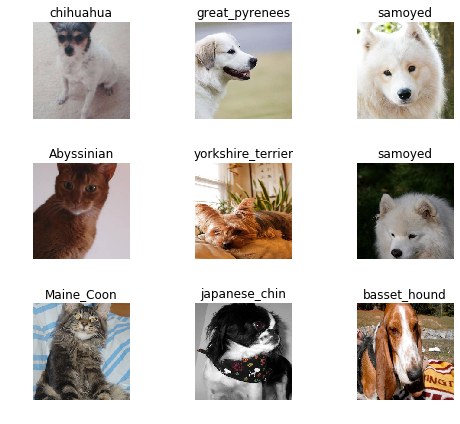

In [18]:
data.show_batch(rows=3, figsize=(7, 6))

In [19]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
